# Final intermediate model: predict n_sick & calls

In [173]:
import sys
print(sys.executable)

/Users/kata/opt/anaconda3/bin/python


In [214]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


In [175]:
# load data
df = pd.read_csv('/Users/kata/Desktop/GitHub/standby_duty_forecasting/sickness_table.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'])
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['week'] = df['date'].dt.isocalendar().week
# change type to not get error
df['week'] = df['week'].astype(np.int64)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1152 entries, 0 to 1151
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1152 non-null   datetime64[ns]
 1   n_sick       1152 non-null   int64         
 2   calls        1152 non-null   float64       
 3   n_duty       1152 non-null   int64         
 4   n_sby        1152 non-null   int64         
 5   sby_need     1152 non-null   float64       
 6   dafted       1152 non-null   float64       
 7   year         1152 non-null   int64         
 8   month        1152 non-null   int64         
 9   day_of_week  1152 non-null   int64         
 10  week         1152 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 108.0 KB


In [176]:
# define X and y data
X = df[['year', 'month', 'day_of_week',
       'week']]
y = df.n_sick

#### train test split

In [177]:
# train test split
def train_test_split(data, n_test):
	return data[:n_test], data[n_test:]


x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)

### Predict n_sick with XGBoost

In [178]:
model = XGBRegressor()

In [179]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [180]:
pred = model.predict(x_test)

In [181]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()


In [182]:
# create df to compare data
df_n_sick_xgb = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_n_sick_xgb = df_n_sick_xgb.drop(['index'], axis=1)
df_n_sick_xgb['predicted'] = df_n_sick_xgb[0]
df_n_sick_xgb = df_n_sick_xgb.drop([0], axis=1)

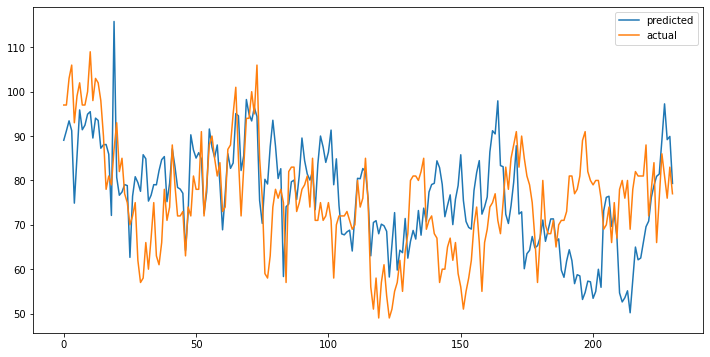

In [183]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_n_sick_xgb['predicted'], label='predicted')
plt.plot(df_n_sick_xgb['n_sick'], label='actual')
plt.legend()
plt.show()


In [184]:
# calculate MSE
mse_xgboost = mean_squared_error(df_n_sick_xgb['n_sick'], df_n_sick_xgb['predicted'])
print('The MSE for XGBoost is:', mse_xgboost)

The MSE for XGBoost is: 167.96080964734261


### Predict with n_sick with Random Forest

In [185]:
model = RandomForestRegressor()

In [186]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [187]:
pred = model.predict(x_test)

In [188]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [189]:
# create df to compare data
df_n_sick_rf = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_n_sick_rf = df_n_sick_rf.drop(['index'], axis=1)
df_n_sick_rf['predicted'] = df_n_sick_rf[0]
df_n_sick_rf = df_n_sick_rf.drop([0], axis=1)

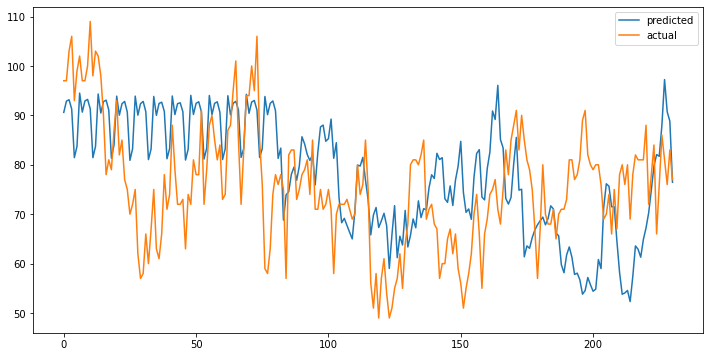

In [190]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_n_sick_rf['predicted'], label='predicted')
plt.plot(df_n_sick_rf['n_sick'], label='actual')
plt.legend()
plt.show()

In [191]:
# calculate MSE
mse_rf = mean_squared_error(df_n_sick_rf['n_sick'], df_n_sick_rf['predicted'])
print('The MSE for Random Forest is:', mse_rf)

The MSE for Random Forest is: 203.80642943722944


### Predict calls with XGBoost

In [192]:
# define X and y data
X = df[['year', 'month', 'day_of_week',
       'week']]
y = df.calls

In [193]:
x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)

In [194]:
model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [195]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [196]:
# create df to compare data
df_calls_xgb = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_calls_xgb = df_calls_xgb.drop(['index'], axis=1)
df_calls_xgb['predicted'] = df_calls_xgb[0]
df_calls_xgb = df_calls_xgb.drop([0], axis=1)

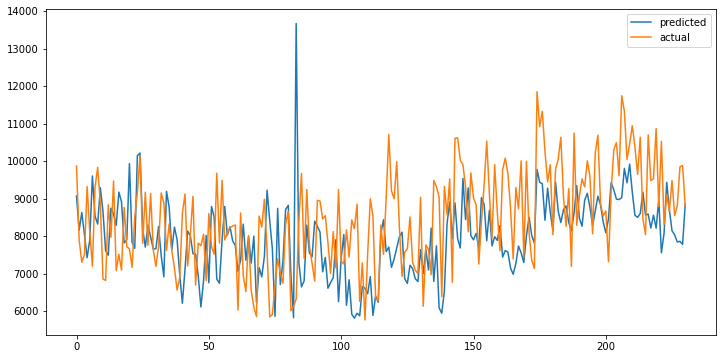

In [197]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_calls_xgb['predicted'], label='predicted')
plt.plot(df_calls_xgb['calls'], label='actual')
plt.legend()
plt.show()

In [198]:
# calculate MSE
mse_xgboost = mean_squared_error(df_calls_xgb['calls'], df_calls_xgb['predicted'])
print('The MSE for XGBoost is:', mse_xgboost)

The MSE for XGBoost is: 2092620.6058171096


### Predict calls with Random Forest

In [199]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [200]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [201]:
# create df to compare data
df_calls_rf = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_calls_rf = df_calls_rf.drop(['index'], axis=1)
df_calls_rf['predicted'] = df_calls_rf[0]
df_calls_rf = df_calls_rf.drop([0], axis=1)

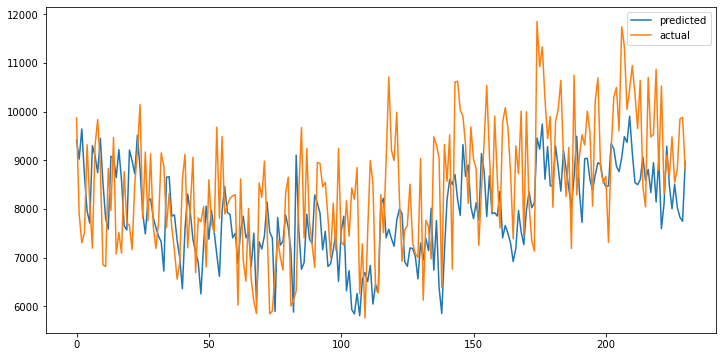

In [202]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_calls_rf['predicted'], label='predicted')
plt.plot(df_calls_rf['calls'], label='actual')
plt.legend()
plt.show()

In [203]:
# calculate MSE
mse_rf = mean_squared_error(df_calls_rf['calls'], df_calls_rf['predicted'])
print('The MSE for Random Forest is:', mse_rf)

The MSE for Random Forest is: 1772896.0849090908


## Predict sby_need with n_sick!

In [204]:
# create new df
# create series with n_sick
n_sick_new = pd.concat([df['n_sick'].iloc[:921], df_n_sick_rf['predicted']], axis=0).reset_index(drop=True)

In [205]:
# add new column into df
df['n_sick_new'] = n_sick_new

In [231]:
# define new X and y data
X = df[['year', 'month', 'day_of_week', 'week', 'n_sick_new']]
y = df.sby_need



In [232]:
x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)

### XGBoost for sby_need with n_sick

In [233]:
model = XGBRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [234]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [235]:
# create df to compare data
df_sby_need_xgb = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_sby_need_xgb = df_sby_need_xgb.drop(['index'], axis=1)
df_sby_need_xgb['predicted'] = df_sby_need_xgb[0]
df_sby_need_xgb = df_sby_need_xgb.drop([0], axis=1)


In [239]:
# get rid of values <0:
df_sby_need_xgb['predicted'] = df_sby_need_xgb['predicted'].apply(lambda x: 0 if x < 0 else x)

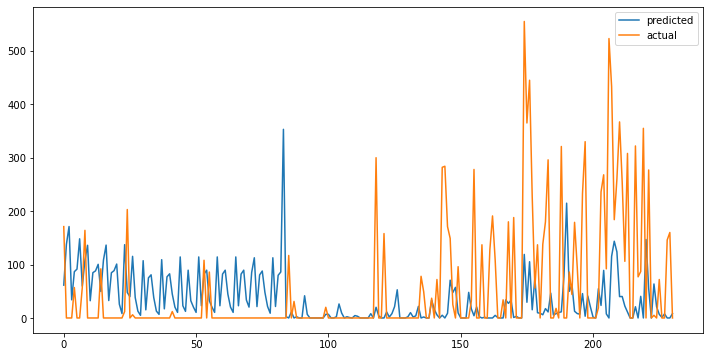

In [240]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_sby_need_xgb['predicted'], label='predicted')
plt.plot(df_sby_need_xgb['sby_need'], label='actual')
plt.legend()
plt.show()

In [241]:
# calculate MSE
mse_xgb = mean_squared_error(df_sby_need_xgb['sby_need'], df_sby_need_xgb['predicted'])
print('The MSE for XGBoost is:', mse_xgb)

The MSE for XGBoost is: 13770.953097515521


In [242]:
Accuracy=r2_score(df_sby_need_xgb['sby_need'], df_sby_need_xgb['predicted'])*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is -21.81


### Random Forest for sby_need with n_sick

In [243]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [244]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [249]:
# create df to compare data
df_sby_need_rf = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_sby_need_rf = df_sby_need_rf.drop(['index'], axis=1)
df_sby_need_rf['predicted'] = df_sby_need_rf[0]
df_sby_need_rf = df_sby_need_rf.drop([0], axis=1)

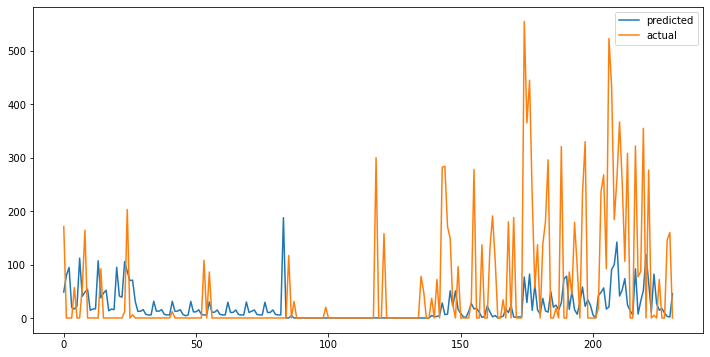

In [250]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_sby_need_rf['predicted'], label='predicted')
plt.plot(df_sby_need_rf['sby_need'], label='actual')
plt.legend()
plt.show()

In [251]:
# calculate MSE
mse_rf = mean_squared_error(df_sby_need_rf['sby_need'], df_sby_need_rf['predicted'])
print('The MSE for RF is:', mse_rf)

The MSE for RF is: 11367.522212121212


## RF with predicted calls:

In [252]:
# create new df
# create series with n_sick
calls_new = pd.concat([df['calls'].iloc[:921], df_calls_rf['predicted']], axis=0).reset_index(drop=True)

In [254]:
# add new column into df
df['calls_new'] = calls_new

In [256]:
# define new X and y data
X = df[['year', 'month', 'day_of_week', 'week', 'calls_new']]
y = df.sby_need

In [257]:
x_train, x_test = train_test_split(X, 921)
y_train, y_test = train_test_split(y, 921)

In [258]:
# RF model
model = RandomForestRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [259]:
# change pred to series for visualizing

pred = pd.Series(pred)
pred = pred.reset_index()
y_test = y_test.reset_index()

In [261]:
# create df to compare data
df_sby_need_rf_2 = pd.concat([pred, y_test], axis=1).reset_index(drop=True)
df_sby_need_rf_2 = df_sby_need_rf_2.drop(['index'], axis=1)
df_sby_need_rf_2['predicted'] = df_sby_need_rf_2[0]
df_sby_need_rf_2 = df_sby_need_rf_2.drop([0], axis=1)

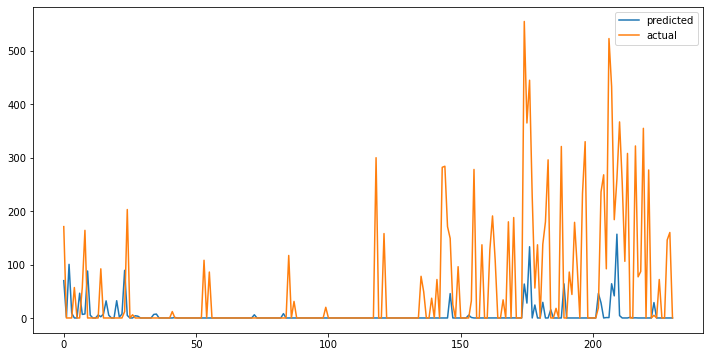

In [263]:
# visualize: does it capture the trend?
plt.figure(figsize=(12,6))
plt.plot(df_sby_need_rf_2['predicted'], label='predicted')
plt.plot(df_sby_need_rf_2['sby_need'], label='actual')
plt.legend()
plt.show()

In [265]:
# calculate MSE
mse_rf = mean_squared_error(df_sby_need_rf_2['sby_need'], df_sby_need_rf_2['predicted'])
print('The MSE for RF is:', mse_rf)

The MSE for RF is: 12712.393524242423
